In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
files = "_u0.03_M2_st550_N1000_v0.3_alg0_0.csv"

In [2]:
resultI = pd.read_csv("Result/Ind_inf"+files)

resultI

,Unnamed: 0,Generation,Cell tag,Expresion and repression,Constant of light rate,Disociation Constants,Hill exponents,Fitness,WCCn,Time,Parent tag
0,0,0.0,0,"[1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...",0.100000,"[0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]","[2, 1.9, 2.8, 2.5]",0.135917,[0.1235 0.1218 0.1204 0.1195 0.1193],[0. 0.5 1. 1.5 2. ],0
1,1,0.0,50,"[1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...",0.100000,"[0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]","[2, 1.9, 2.8, 2.5]",0.135917,[0.1235 0.1218 0.1204 0.1195 0.1193],[0. 0.5 1. 1.5 2. ],0
2,2,0.0,100,"[1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...",0.100000,"[0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]","[2, 1.9, 2.8, 2.5]",0.135917,[0.1235 0.1218 0.1204 0.1195 0.1193],[0. 0.5 1. 1.5 2. ],0
3,3,0.0,150,"[1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...",0.100000,"[0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]","[2, 1.9, 2.8, 2.5]",0.135917,[0.1235 0.1218 0.1204 0.1195 0.1193],[0. 0.5 1. 1.5 2. ],0
4,4,0.0,200,"[1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...",0.100000,"[0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]","[2, 1.9, 2.8, 2.5]",0.135917,[0.1235 0.1218 0.1204 0.1195 0.1193],[0. 0.5 1. 1.5 2. ],0
...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,4999.0,750,[3.66869554e-01 9.78937170e-01 7.60256478e+00 ...,0.713908,[3.52105784e-02 5.49975316e-01 4.93971914e-03 ...,[0.86398115 1.23379646 8.9514747 1.44647731],0.034890,[0.1636 0.1632 0.1632 0.1637 0.1646],[ 9998.01782972 9998.5 9999. ...,998
99996,99996,4999.0,800,[3.66869554e-01 9.78937170e-01 7.60256478e+00 ...,0.713908,[3.52105784e-02 5.49975316e-01 4.93971914e-03 ...,[0.86398115 1.23379646 8.9514747 1.44647731],0.034890,[0.1636 0.1632 0.1632 0.1637 0.1646],[ 9998.01782972 9998.5 9999. ...,999
99997,99997,4999.0,850,[3.66869554e-01 9.78937170e-01 7.60256478e+00 ...,0.713908,[3.52105784e-02 5.49975316e-01 4.93971914e-03 ...,[0.86398115 1.23379646 8.9514747 1.44647731],0.034890,[0.1636 0.1632 0.1632 0.1637 0.1646],[ 9998.01782972 9998.5 9999. ...,998
99998,99998,4999.0,900,[3.66869554e-01 9.78937170e-01 7.60256478e+00 ...,0.713908,[3.52105784e-02 5.49975316e-01 4.93971914e-03 ...,[0.86398115 1.23379646 8.9514747 1.44647731],0.034890,[0.1636 0.1632 0.1632 0.1637 0.1646],[ 9998.01782972 9998.5 9999. ...,999


In [3]:
rW = np.array(resultI["WCCn"])
rT = np.array(resultI["Time"])
count=[]
for i in range(len(rW)):
    try:
        rW[i]=list(np.array(np.mat(rW[i]))[0])
        rT[i]=list(np.array(np.mat(rT[i]))[0])
    except:
        count.append(i)
        print(i)

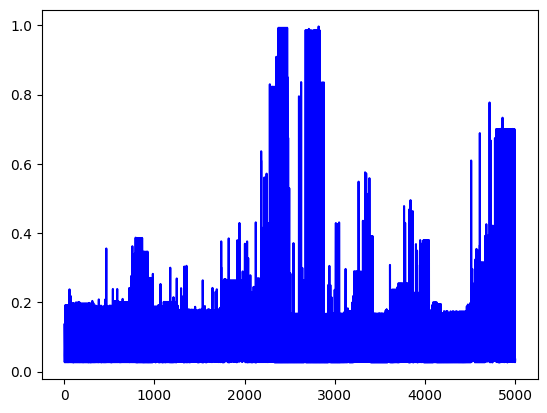

In [4]:
plt.figure()
plt.plot(resultI["Generation"],resultI["Fitness"],"-b")
plt.title("Fitness")
plt.show()

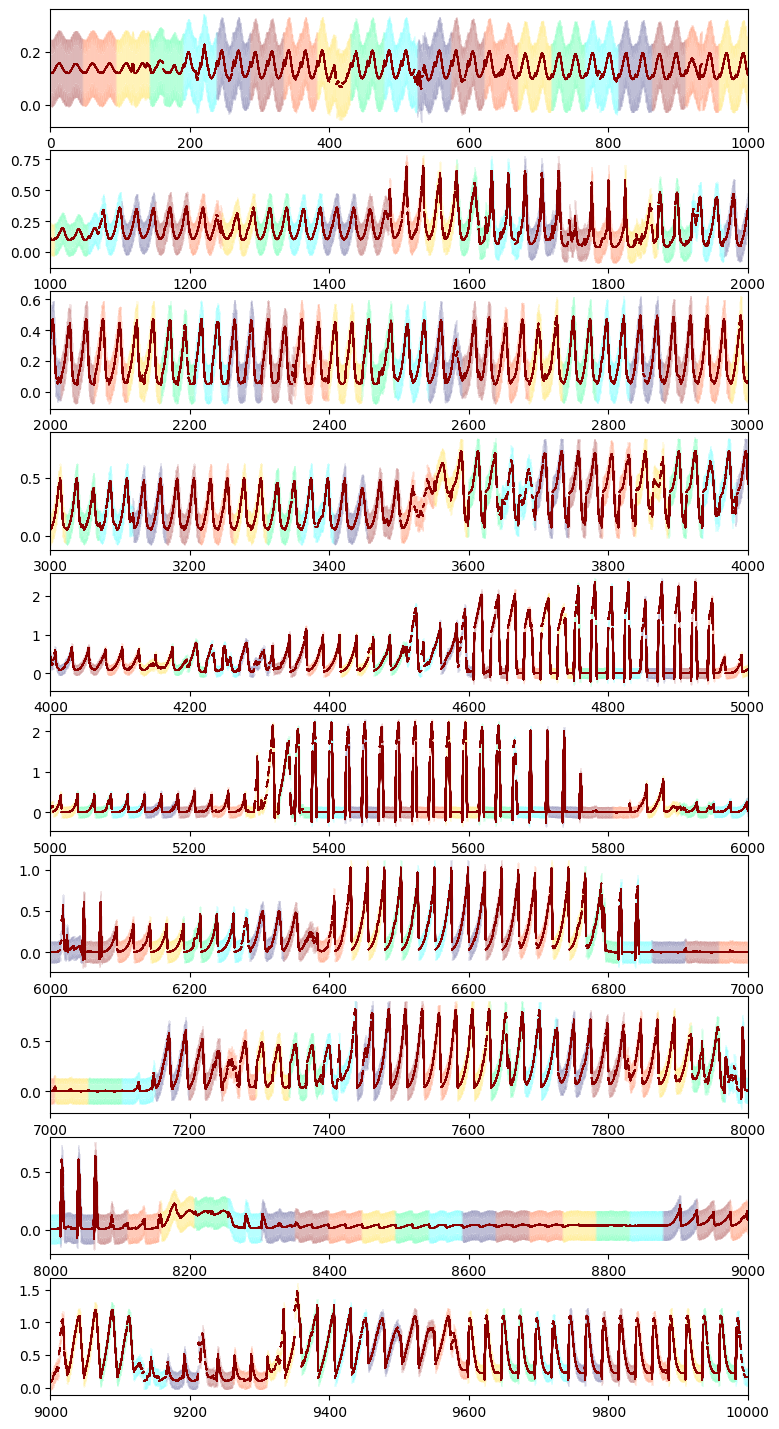

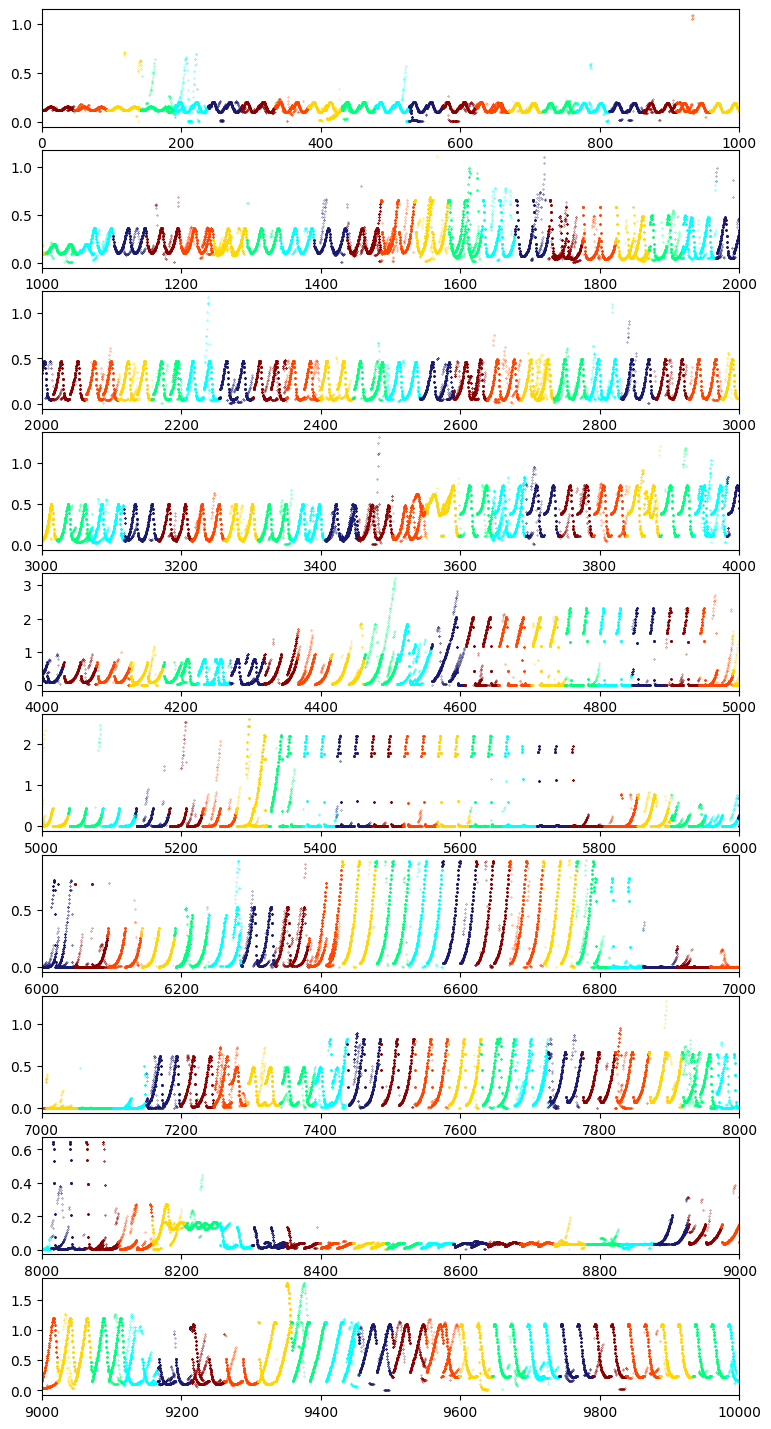

In [5]:
color=["darkred","orangered","gold","springgreen","cyan","midnightblue"]
fig1, ax1 = plt.subplots(10,figsize=(9,18))
fig2, ax2 = plt.subplots(10,figsize=(9,18))
count=500
for i in range(1,5001):
    x,y = list(rT[(i-1)*20:i*20]),list(rW[(i-1)*20:i*20])
    x,y = np.array(x).reshape(100),np.array(y).reshape(100)
    # fit a linear curve and estimate its y-values and their error.
    a,b,c = np.polyfit(x, y, deg=2)
    y_est = a * x**2 + b*x + c
    y_err = x.std() * np.sqrt(1/len(x) +
            (x - x.mean())**2 / np.sum((x - x.mean())**2))
    
    ax1[(i-1)//500].plot(x, y_est, '-',color="darkred",linewidth=1)
    ax1[(i-1)//500].fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2,color=color[i//24%6])
    ax2[(i-1)//500].plot(x, y, '.', color=color[i//24%6],markersize=.5)
    
    if count==i:
        ax1[(i-1)//500].set_xlim((i-500)*2,i*2)
        ax2[(i-1)//500].set_xlim((i-500)*2,i*2)
        count += 500
    
plt.show()


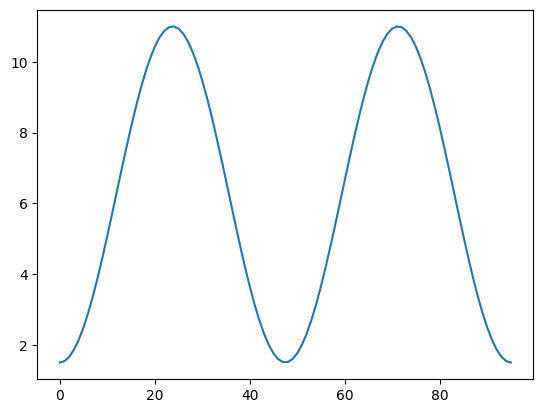

In [6]:
time=np.linspace(0,48,96)
amp = (11-1.5)/2
yd = 1.5 + amp
WCCopt = yd + amp*(np.cos(2*np.pi*(time+12)/24))
plt.plot(WCCopt)
plt.show()

In [7]:
resultA = pd.read_csv("Result/AveGenSub"+files)

resultA

,Unnamed: 0,Generation,Expresion and repression constants,Constant of light rate,Disociation constants,Hill exponents,WCC,Fitness
0,0,1.0,[1.12034188e+00 1.30010461e+00 9.49770911e+01 ...,0.100000,[0.02999897 0.28988165 0.049029 4.86 1...,[2.00063456 1.9 2.8 2.5 ],0.120836,0.170056
1,1,2.0,[1.12001679e+00 1.30045006e+00 9.50172004e+01 ...,0.100000,[0.02998945 0.28990728 0.04904254 4.86024142 1...,[2.00093083 1.90039369 2.7992382 2.49975028],0.121225,0.102883
2,2,3.0,[1.11998089e+00 1.30031063e+00 9.50658919e+01 ...,0.100024,[0.02998526 0.28983425 0.04904513 4.86 1...,[2.00175868 1.9 2.79754743 2.50105031],0.128266,0.060033
3,3,4.0,[1.12049419e+00 1.30024355e+00 9.50440143e+01 ...,0.100031,[0.02998526 0.2899724 0.04904243 4.86384367 1...,[2.00176366 1.90135547 2.7966878 2.50360588],0.137429,0.040274
4,4,5.0,[1.12095431e+00 1.30121621e+00 9.49618353e+01 ...,0.099950,[0.02999742 0.28994391 0.04908638 4.86015669 1...,[2.00589606 1.90282668 2.79776097 2.5012243 ],0.146138,0.031347
...,...,...,...,...,...,...,...,...
4995,4995,4996.0,[3.75289819e-01 1.05792834e+00 1.12210066e+01 ...,0.713874,[3.52113281e-02 5.50559197e-01 4.94417334e-03 ...,[0.87372226 1.2340909 8.95409644 1.44632729],0.484050,0.044497
4996,4996,4997.0,[3.74154669e-01 1.04529338e+00 1.07030927e+01 ...,0.713891,[3.52399808e-02 5.50678982e-01 4.94397812e-03 ...,[0.87168434 1.23383812 8.95528007 1.44737049],0.338945,0.032690
4997,4997,4998.0,[3.72360533e-01 1.02879061e+00 9.94497326e+00 ...,0.714208,[3.52420274e-02 5.50391545e-01 4.94264394e-03 ...,[0.86929426 1.23364165 8.96463011 1.44840538],0.251803,0.028339
4998,4998,4999.0,[3.70558161e-01 1.01460586e+00 9.26049964e+00 ...,0.713960,[3.52335866e-02 5.49957789e-01 4.94644235e-03 ...,[0.86766635 1.23394989 8.96342901 1.44795142],0.206445,0.028126


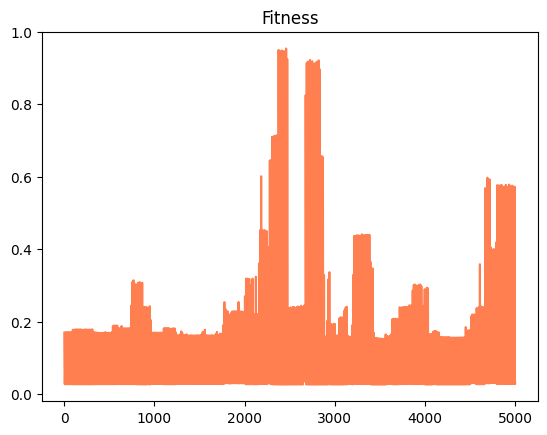

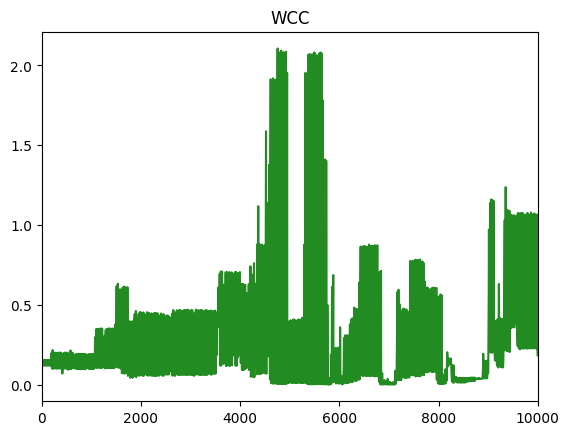

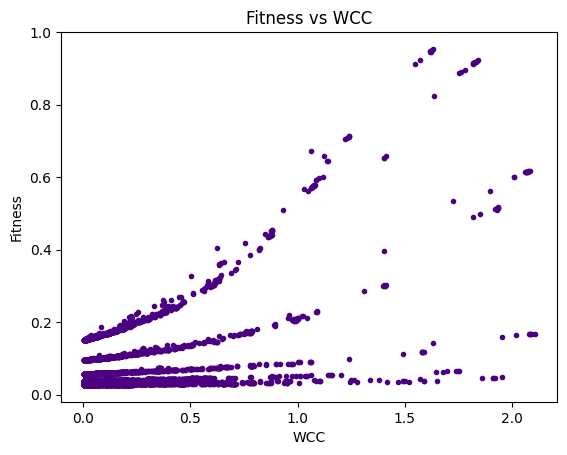

In [8]:
plt.figure()
plt.plot(resultA["Generation"],resultA["Fitness"],'-',color='coral')
#plt.vlines(range(0,len(resultA["Fitness"]),24),0,max(resultA["Fitness"]))
plt.title("Fitness")
#plt.xlim([0,5000])
#plt.savefig("Result/Light_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg")
plt.show()

plt.figure()
plt.plot(range(0,len(resultA["WCC"])*2,2),resultA["WCC"],'-',color='forestgreen')
#plt.vlines(range(0,len(resultA["WCC"])*2,48),0,max(resultA["WCC"]))
plt.title("WCC")
plt.xlim([0,10000])
#plt.savefig("Result/Light_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg")
plt.show()

plt.figure()
plt.plot(resultA["WCC"],resultA["Fitness"],'.',color='indigo')
plt.title("Fitness vs WCC")
plt.xlabel("WCC")
plt.ylabel("Fitness")
plt.show()

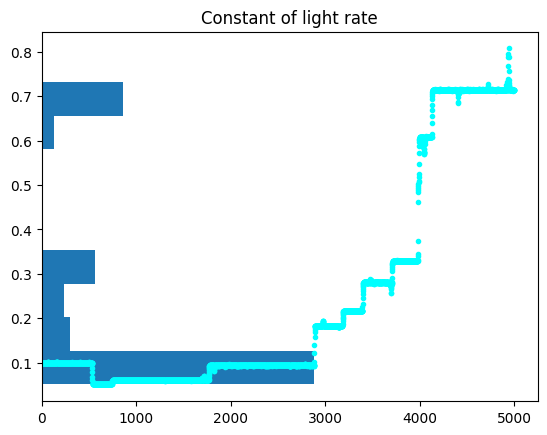

In [9]:
plt.plot(resultA["Constant of light rate"],".",color='cyan')
plt.hist(resultA["Constant of light rate"],orientation="horizontal")
plt.title("Constant of light rate")
#plt.savefig("Result/Light_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg")
plt.show()

In [10]:
ERk = [[0]*23]
for k in resultA["Expresion and repression constants"]:
    ERk = np.append(ERk,np.mat(k)[0],axis=0)
ERk = ERk[1:,:]

Dkm = [[0]*7]
for km in resultA["Disociation constants"]:
    Dkm = np.append(Dkm,np.array(np.mat(km)),axis=0)
Dkm = Dkm[1:,:]

nH = [[0]*4]
for n in resultA["Hill exponents"]:
    nH = np.append(nH,np.mat(n)[0],axis=0)
nH = nH[1:]

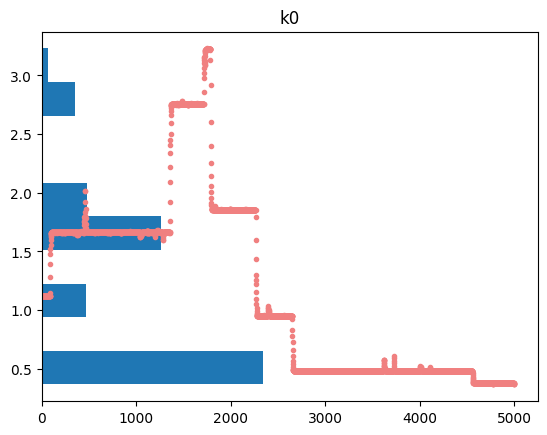

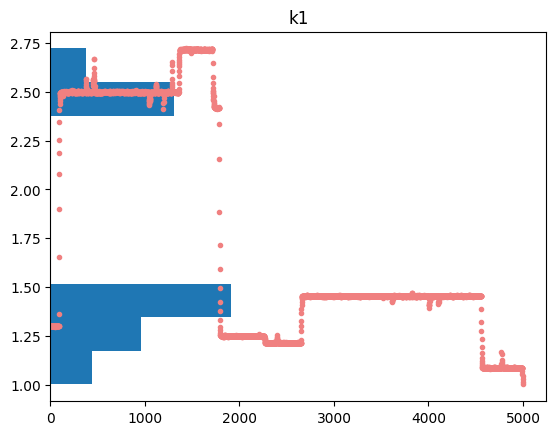

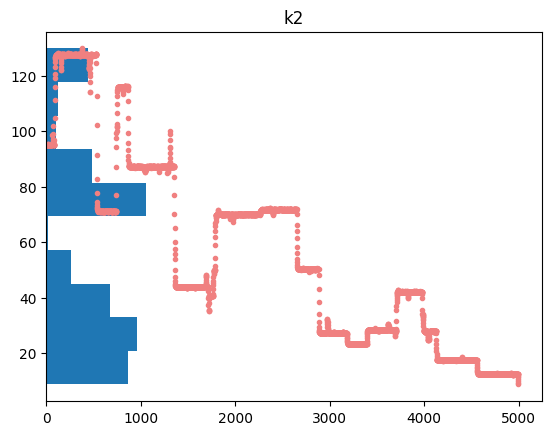

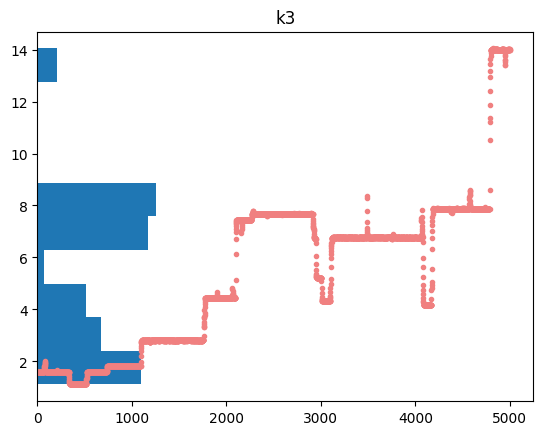

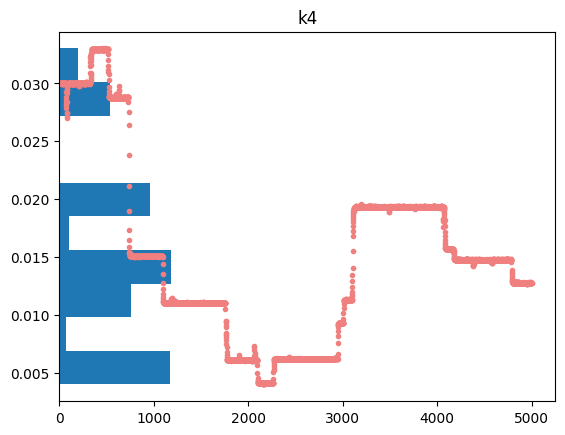

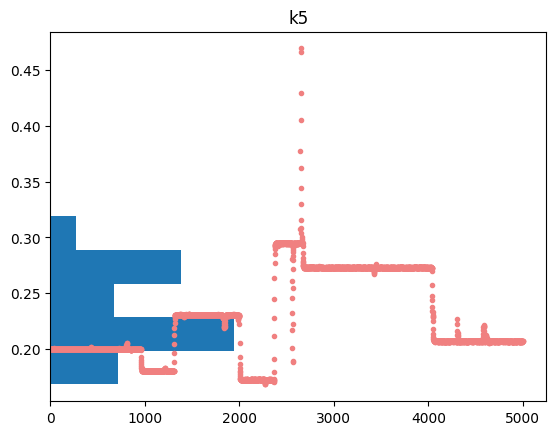

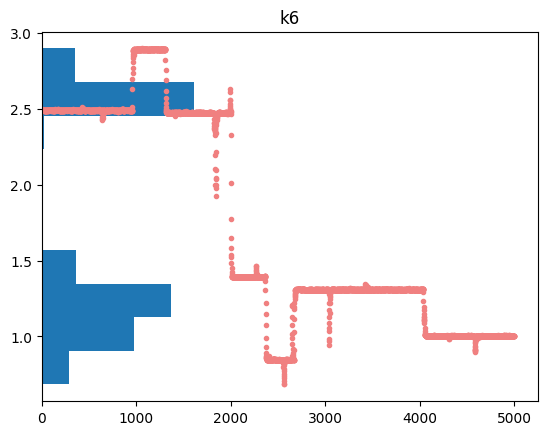

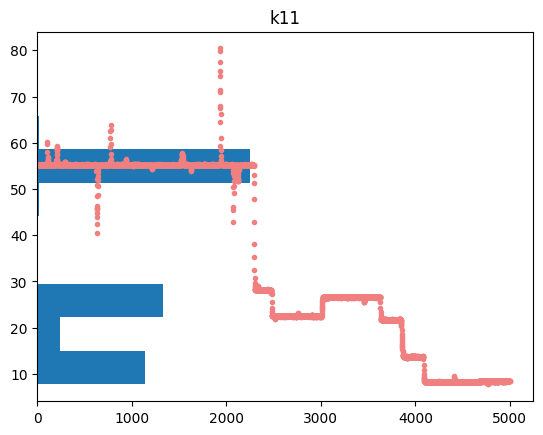

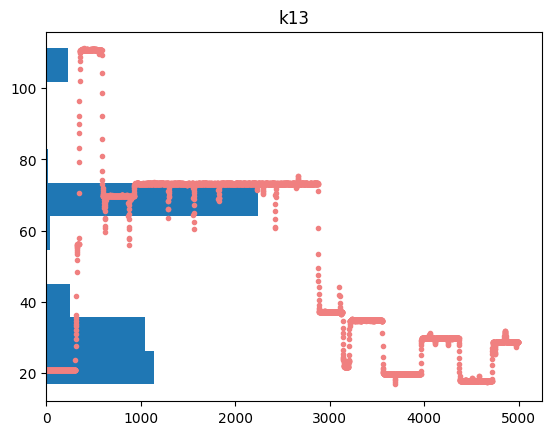

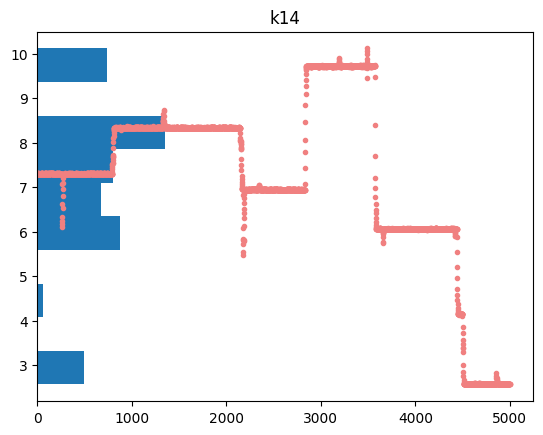

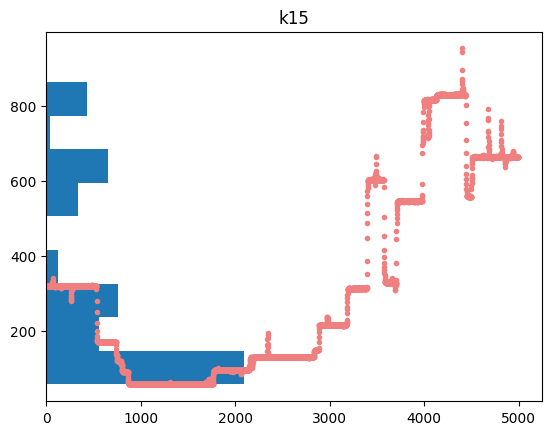

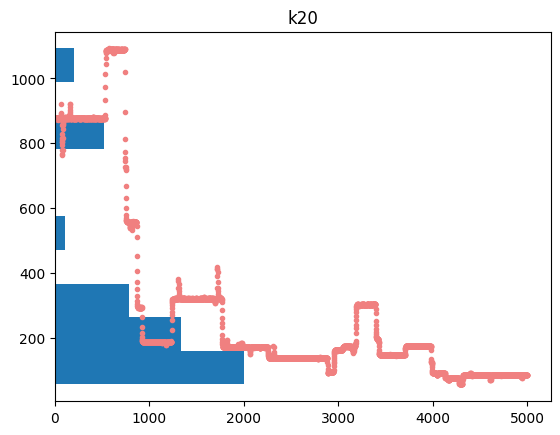

In [11]:
for i in range(0,23):
    if not i in [7,8,9,10,12,16,17,18,19,21,22]:
        plt.plot(ERk[:,i],'.',color="lightcoral")
        plt.hist(ERk[:,i],orientation="horizontal")
        plt.title("k{}".format(i))
        #plt.savefig("Result/k{}_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg".format(i))
        plt.show()

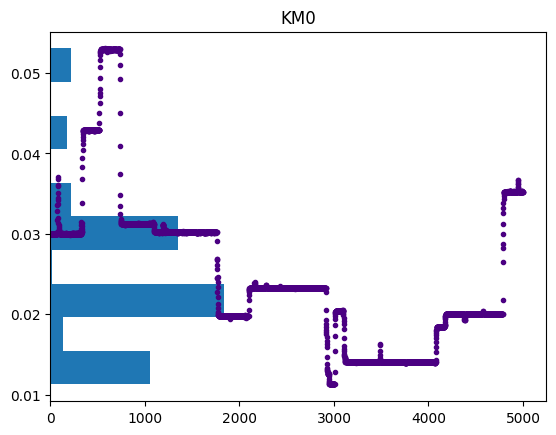

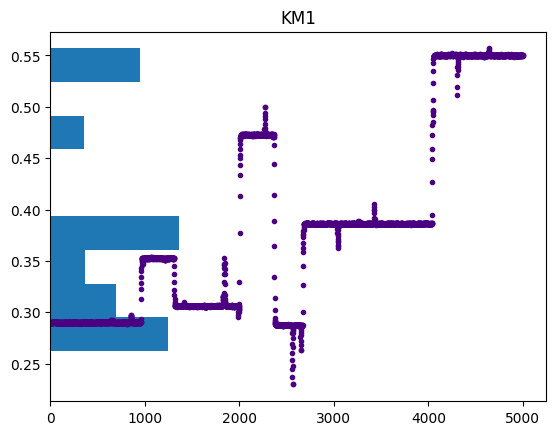

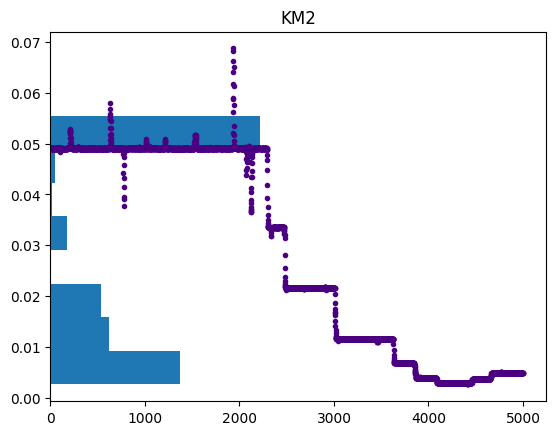

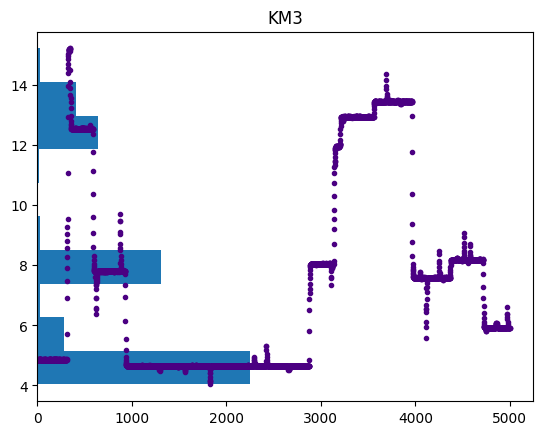

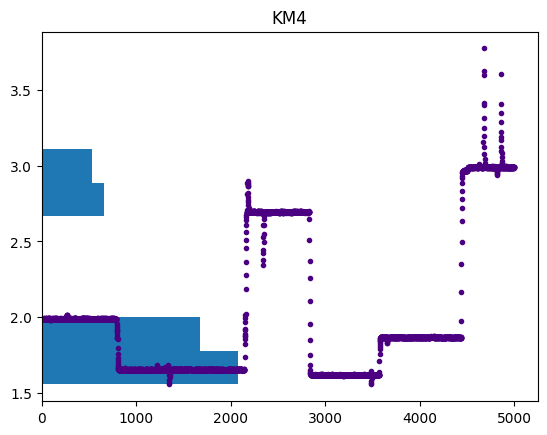

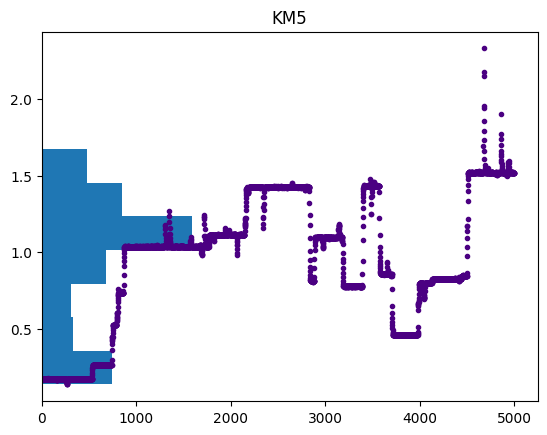

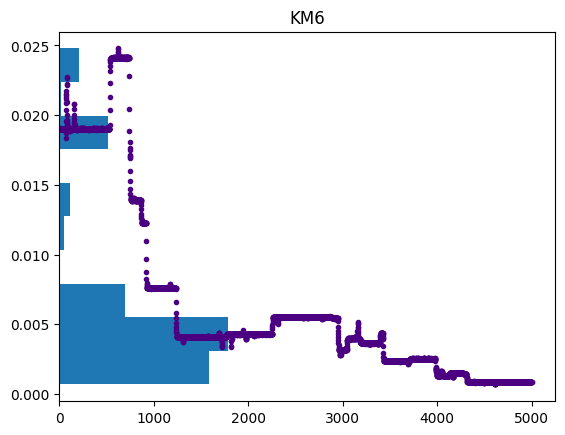

In [13]:
for i in range(0,7):
    plt.plot(Dkm[:,i],'.',color="indigo")
    plt.hist(Dkm[:,i],orientation="horizontal")
    plt.title("KM{}".format(i))
    #plt.savefig("Result/k{}_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg".format(i))
    plt.show()

In [14]:
from scipy import stats
def normalidad_variable_numerica(col):
    stats.probplot(resultA[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

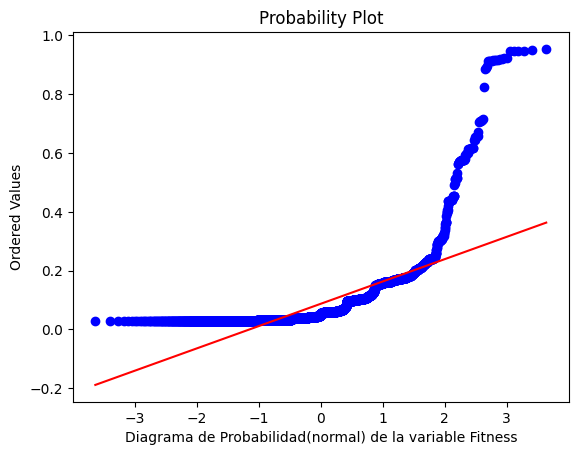

In [15]:
normalidad_variable_numerica("Fitness")

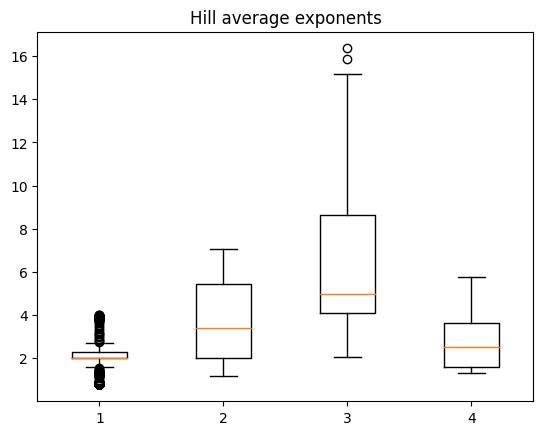

In [17]:
plt.boxplot(nH)
plt.title("Hill average exponents")
#plt.savefig("Result/Hillexp_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg")
plt.show()

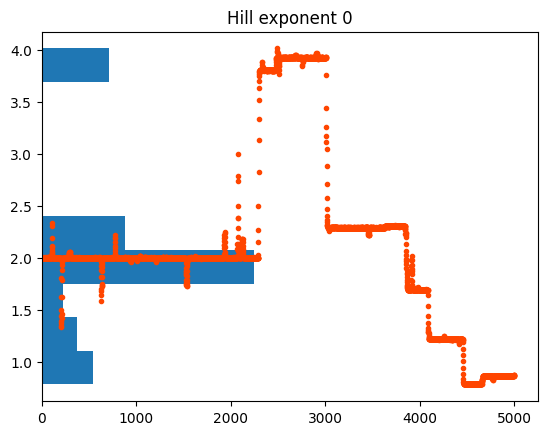

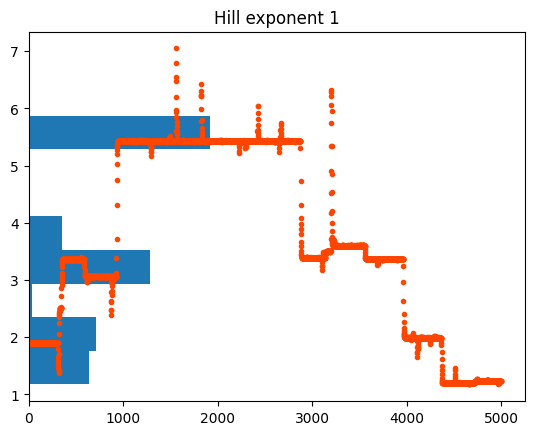

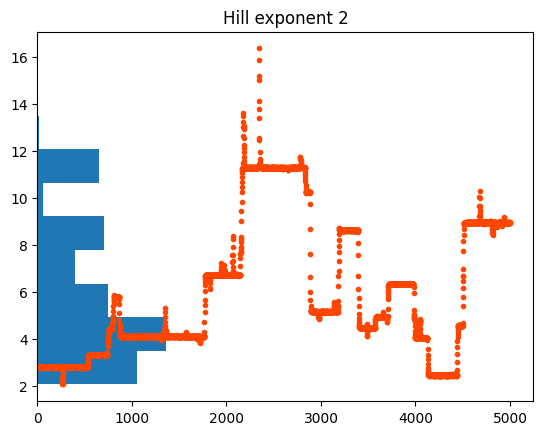

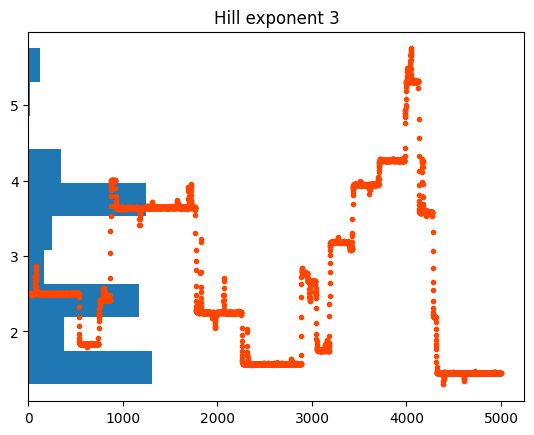

In [18]:
for i in range(0,4):
    plt.plot(nH[:,i],'.',color="orangered")
    plt.hist(nH[:,i],orientation="horizontal")
    plt.title("Hill exponent {}".format(i))
    #plt.savefig("Result/k{}_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg".format(i))
    plt.show()

In [19]:
resultL = pd.read_csv("Result/LineagexCycle"+files)

resultL

,Unnamed: 0,Generation,LTag,LMut,LFit,Expresion and repression,Constant of light rate,Disociation Constants,Hill exponents
0,0,0.0,0,0,1.723974e-04,"[1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...",0.100000,"[0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]","[2, 1.9, 2.8, 2.5]"
1,1,0.0,1,0,1.723950e-04,"[1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...",0.100000,"[0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]","[2, 1.9, 2.8, 2.5]"
2,2,0.0,2,0,1.723926e-04,"[1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...",0.100000,"[0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]","[2, 1.9, 2.8, 2.5]"
3,3,0.0,3,0,1.723902e-04,"[1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...",0.100000,"[0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]","[2, 1.9, 2.8, 2.5]"
4,4,0.0,4,0,1.723878e-04,"[1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...",0.100000,"[0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]","[2, 1.9, 2.8, 2.5]"
...,...,...,...,...,...,...,...,...,...
208995,208995,4992.0,999,1,5.401569e-07,[3.78337678e-01 1.08715913e+00 1.25715835e+01 ...,0.713908,[3.52105784e-02 5.49975316e-01 5.08022278e-03 ...,[1.3446878 1.23379646 8.9514747 1.44647731]
208996,208996,4992.0,999,0,5.848015e-07,[3.78337678e-01 1.08715913e+00 1.25715835e+01 ...,0.713908,[3.52105784e-02 5.49975316e-01 4.93971914e-03 ...,[0.86398115 1.23379646 8.9514747 1.44647731]
208997,208997,4992.0,999,0,5.848015e-07,[3.78337678e-01 1.08715913e+00 1.25715835e+01 ...,0.713908,[3.52105784e-02 5.49975316e-01 4.93971914e-03 ...,[0.86398115 1.23379646 8.9514747 1.44647731]
208998,208998,4992.0,999,0,5.848015e-07,[3.78337678e-01 1.08715913e+00 1.25715835e+01 ...,0.713908,[3.52105784e-02 5.49975316e-01 4.93971914e-03 ...,[0.86398115 1.23379646 8.9514747 1.44647731]


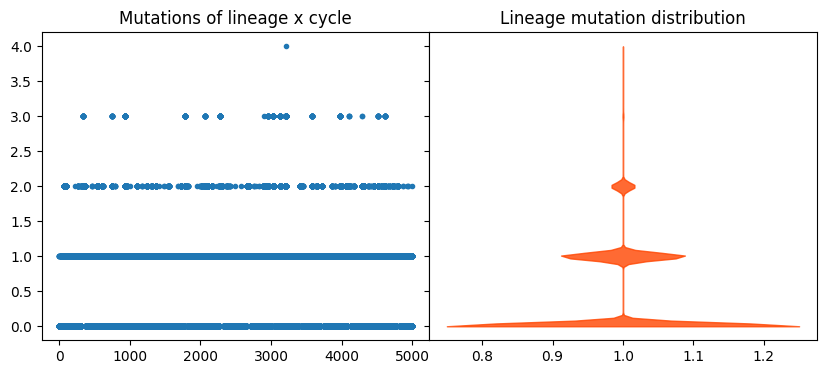

In [20]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(10,4))
ax[0].plot(resultL["Generation"],resultL["LMut"],".")
ax[0].set_title("Mutations of lineage x cycle")
vp=ax[1].violinplot(resultL["LMut"],showextrema=False)
for body in vp['bodies']:
    body.set_color("orangered")
    body.set_alpha(0.8)
plt.title("Lineage mutation distribution")
plt.subplots_adjust(wspace=0)
plt.show()

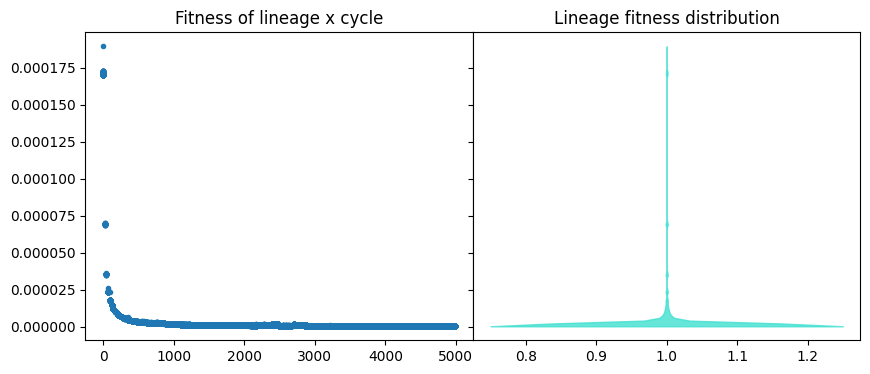

In [21]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(10,4))
ax[0].plot(resultL["Generation"],resultL["LFit"],".")
ax[0].set_title("Fitness of lineage x cycle")
vp=ax[1].violinplot(resultL["LFit"],showextrema=False)
for body in vp['bodies']:
    body.set_color("turquoise")
    body.set_alpha(0.8)
plt.title("Lineage fitness distribution")
plt.subplots_adjust(wspace=0)
plt.show()

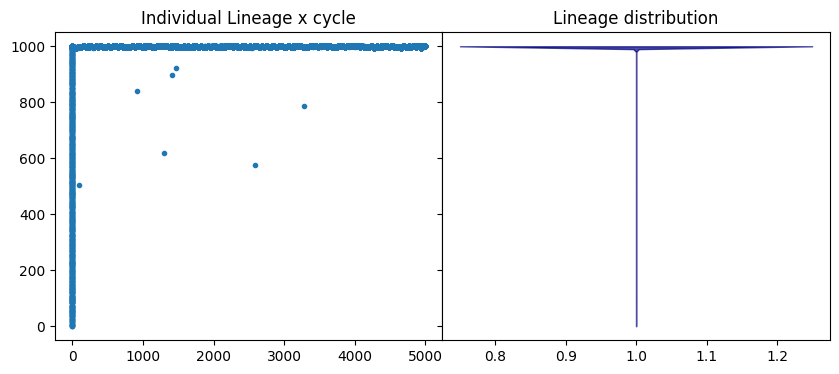

In [22]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(10,4))
ax[0].plot(resultL["Generation"],resultL["LTag"],".")
ax[0].set_title("Individual Lineage x cycle")
vp=ax[1].violinplot(resultL["LTag"],showextrema=False)
for body in vp['bodies']:
    body.set_color("navy")
    body.set_alpha(0.7)
plt.title("Lineage distribution")
plt.subplots_adjust(wspace=0)
plt.show()

In [23]:
ERk = [[0]*23]
for k in resultL["Expresion and repression"]:
    ERk = np.append(ERk,np.mat(k)[0],axis=0)
ERk = ERk[1:,:]



AttributeError: 'bool' object has no attribute 'astype'

In [25]:
Dkm = [[0]*7]
for km in resultL["Disociation Constants"]:
    Dkm = np.append(Dkm,np.array(np.mat(km)),axis=0)
Dkm = Dkm[1:,:]

nH = [[0]*4]
for n in resultL["Hill exponents"]:
    nH = np.append(nH,np.mat(n)[0],axis=0)
nH = nH[1:]

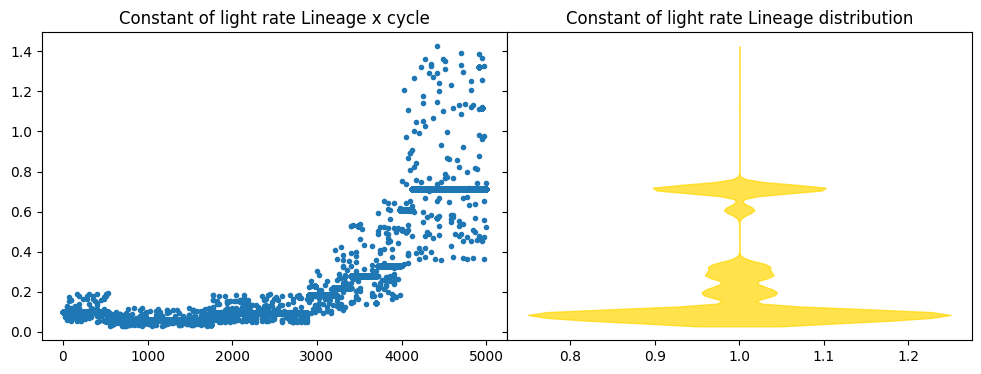

In [28]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(12,4))
ax[0].plot(resultL["Generation"],resultL["Constant of light rate"],".")
ax[0].set_title("Constant of light rate Lineage x cycle")
vp=ax[1].violinplot(resultL["Constant of light rate"],showextrema=False)
for body in vp['bodies']:
    body.set_color("gold")
    body.set_alpha(0.7)
plt.title("Constant of light rate Lineage distribution")
plt.subplots_adjust(wspace=0)
plt.show()

In [ ]:
vp=plt.violinplot(ERk,showextrema=False)
for body in vp['bodies']:
    body.set_color("chocolate")
    body.set_alpha(0.7)
plt.title("Lineage distribution")
plt.show()

vp=plt.violinplot(Dkm,showextrema=False)
for body in vp['bodies']:
    body.set_color("magenta")
    body.set_alpha(0.7)
plt.title("Lineage distribution")
plt.show()

vp=plt.violinplot(nH,showextrema=False)
for body in vp['bodies']:
    body.set_color("darkseagreen")
    body.set_alpha(0.7)
plt.title("Hill exponents Lineage distribution")
plt.show()